In [1]:
import random
import math
import csv
import numpy as np


In [2]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [3]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
class MLP:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
      
        limit_ih = 1 / math.sqrt(input_nodes)
        limit_ho = 1 / math.sqrt(hidden_nodes)
        
        self.weights_input_hidden = [[random.uniform(-limit_ih, limit_ih) for _ in range(hidden_nodes)] for _ in range(input_nodes)]
        self.weights_hidden_output = [random.uniform(-limit_ho, limit_ho) for _ in range(hidden_nodes)]
        self.bias_hidden = [random.uniform(-limit_ih, limit_ih) for _ in range(hidden_nodes)]
        self.bias_output = random.uniform(-limit_ho, limit_ho)
        self.training_loss=[]
        
    def forward(self, inputs):
   
        self.hidden_layer = []
        for i in range(self.hidden_nodes):
            weighted_sum = sum(inputs[j] * self.weights_input_hidden[j][i] for j in range(self.input_nodes)) + self.bias_hidden[i]
            self.hidden_layer.append(sigmoid(weighted_sum))
        output_weighted_sum = sum(self.hidden_layer[i] * self.weights_hidden_output[i] for i in range(self.hidden_nodes)) + self.bias_output
        self.output = sigmoid(output_weighted_sum)
        return self.output
    
    def backward(self, inputs, expected_output, learning_rate):
        output_error = expected_output - self.output
        output_delta = output_error * sigmoid_derivative(self.output)
        hidden_errors = [self.weights_hidden_output[i] * output_delta for i in range(self.hidden_nodes)]
        hidden_deltas = [hidden_errors[i] * sigmoid_derivative(self.hidden_layer[i]) for i in range(self.hidden_nodes)]
        for i in range(self.hidden_nodes):
            self.weights_hidden_output[i] += learning_rate * output_delta * self.hidden_layer[i]
        self.bias_output += learning_rate * output_delta
        for i in range(self.input_nodes):
            for j in range(self.hidden_nodes):
                self.weights_input_hidden[i][j] += learning_rate * hidden_deltas[j] * inputs[i]
        for i in range(self.hidden_nodes):
            self.bias_hidden[i] += learning_rate * hidden_deltas[i]
    
    def train(self, dataset, epochs, learning_rate, batch_size=2):
        for epoch in range(epochs):
            total_error = 0
            random.shuffle(dataset)  
            for i in range(0, len(dataset), batch_size):
                batch = dataset[i:i + batch_size]
                batch_error = 0
                
                for data in batch:
                    inputs = [data[0], data[1]]
                    expected_output = data[2]
                    self.forward(inputs)
                    self.backward(inputs, expected_output, learning_rate)
                    batch_error += (expected_output - self.output) ** 2
                
                total_error += batch_error / batch_size
            self.training_loss.append(total_error)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Error: {total_error}")
    
    def predict(self, inputs):
        output = self.forward(inputs)
        return 1 if output > 0.5 else 0

In [5]:
def load_dataset(filename):
    dataset = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            dataset.append([float(row[-3]), float(row[-2]), float(row[-1])])  # Ensure last three columns are used
    return dataset

In [6]:
def split_dataset(dataset, train_ratio=0.8):
    random.shuffle(dataset)
    train_size = int(len(dataset) * train_ratio)
    return dataset[:train_size], dataset[train_size:]


In [7]:
dataset = load_dataset("xor.csv")
train_data, validation_data = split_dataset(dataset)

In [8]:
mlp = MLP(input_nodes=2, hidden_nodes=4, output_nodes=1)
mlp.train(train_data, epochs=10000, learning_rate=0.1, batch_size=2)


Epoch 0, Error: 101.06137475419966
Epoch 1000, Error: 6.198250617718706
Epoch 2000, Error: 4.843734951989048
Epoch 3000, Error: 4.517119614784414
Epoch 4000, Error: 3.909579464128246
Epoch 5000, Error: 3.915270206931568
Epoch 6000, Error: 3.8026696427546667
Epoch 7000, Error: 3.802573735733928
Epoch 8000, Error: 3.5277802551162587
Epoch 9000, Error: 3.3330512382640594


In [9]:
correct_predictions = 0
print("\nValidation Results:")
if len(validation_data) > 0:
    for data in validation_data:
        inputs = [data[0], data[1]]
        prediction = mlp.predict(inputs)
        actual_label = int(data[2])
        print(f"Input: {inputs}, Predicted Label: {prediction}, Actual Label: {actual_label}")
        if prediction == actual_label:
            correct_predictions += 1
    accuracy = (correct_predictions / len(validation_data)) * 100
    print(f"\nValidation Accuracy: {accuracy:.2f}%")
else:
    print("No validation data available.")


Validation Results:
Input: [0.909265459047228, 0.4494478147489037], Predicted Label: 1, Actual Label: 1
Input: [0.21133199607316877, 0.5477760703275425], Predicted Label: 1, Actual Label: 1
Input: [0.40672307570203925, 0.8602713389236996], Predicted Label: 1, Actual Label: 1
Input: [0.007918874456447733, 0.4817555290143672], Predicted Label: 1, Actual Label: 0
Input: [0.6517986038165704, 0.4371820046741696], Predicted Label: 1, Actual Label: 1
Input: [0.19134235993999116, 0.27442640921133543], Predicted Label: 0, Actual Label: 0
Input: [0.5760341888351073, 0.6871444296568735], Predicted Label: 0, Actual Label: 0
Input: [0.7553466258037524, 0.21225570084138362], Predicted Label: 1, Actual Label: 1
Input: [0.7147170950828853, 0.2717533735823953], Predicted Label: 1, Actual Label: 1
Input: [0.642687239155542, 0.21091317831602036], Predicted Label: 1, Actual Label: 1
Input: [0.22263449325114593, 0.8195404305375278], Predicted Label: 1, Actual Label: 1
Input: [0.5221457583691931, 0.1969867

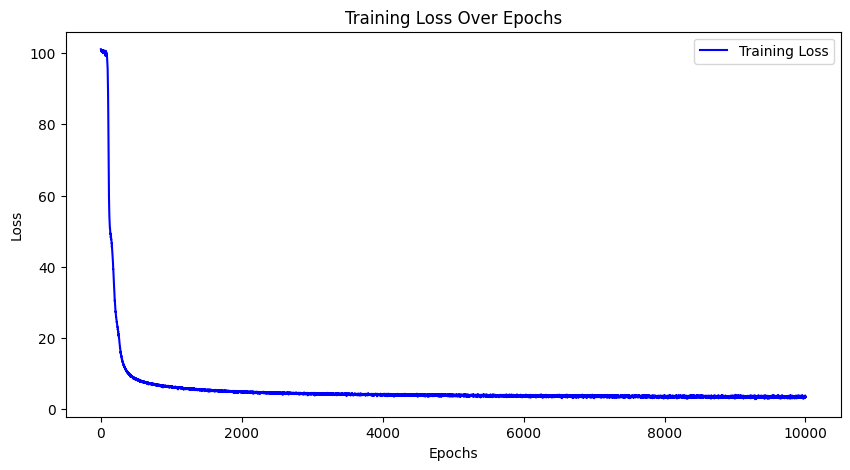

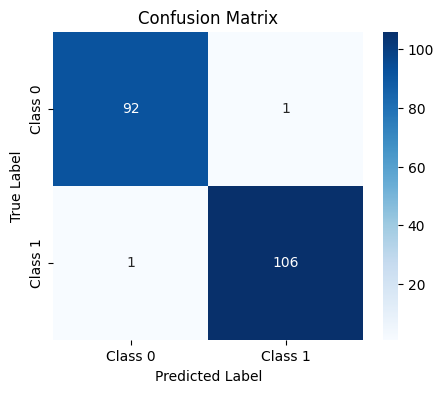

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Plot training loss
plt.figure(figsize=(10,5))
plt.plot(mlp.training_loss, label='Training Loss', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Confusion Matrix
true_labels = []
predicted_labels = []
for data in validation_data:
    inputs = [data[0], data[1]]
    predicted_labels.append(mlp.predict(inputs))
    true_labels.append(int(data[2]))

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()